In [1]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords  
from nltk import word_tokenize 
from nltk.stem import WordNetLemmatizer  

from sklearn.feature_extraction.text import TfidfVectorizer

eng_stop_words=list(nltk.corpus.stopwords.words('russian'))
rus_stop_words=list(nltk.corpus.stopwords.words('english'))
stop_words = eng_stop_words + rus_stop_words + ['vk', 'com', 'http']
stop_words

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/danil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/danil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/danil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/danil/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df=pd.read_csv(r'crypto_2021-13-15.csv')
df = pd.DataFrame(data=df['text'])
df.rename(columns={'text': 'headline_text'}, inplace=True)
df

,headline_text
0,Despite a nationwide crackdown on cryptocurren...
1,HEY!! \nFriends I think that maybe you don't h...
2,ТОТАЛ на 1ч тф. Отражение рынка. Шанс для сдел...
3,[club141595830|CRYPTO COUNTER MUSIC™]
4,🍊🐸🔶 Investitori odustaju od kriptovaluta u re...
...,...
2996,Нидерланды используют тепло от майнеров для вы...
2997,Ключевые новости криптомайнинга\n\nИзвестный ж...
2998,Биткоин-майнер TeraWulf привлек $10 млн для по...
2999,` Дело добровольное. Депутаты кардинально пере...


In [4]:
def clean_text(headline):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(headline)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>2]
    cleaned_text=" ".join(tokens)
#     print(headline, '\n')
    return cleaned_text

In [5]:
df['headline_cleaned_text']=df['headline_text'].apply(clean_text)

In [6]:
df

,headline_text,headline_cleaned_text
0,Despite a nationwide crackdown on cryptocurren...,Despite nationwide crackdown cryptocurrency Ch...
1,HEY!! \nFriends I think that maybe you don't h...,HEY Friends think maybe n't doubt anymore time...
2,ТОТАЛ на 1ч тф. Отражение рынка. Шанс для сдел...,ТОТАЛ Отражение рынка Шанс сделки Crypto Total...
3,[club141595830|CRYPTO COUNTER MUSIC™],club141595830|CRYPTO COUNTER MUSIC™
4,🍊🐸🔶 Investitori odustaju od kriptovaluta u re...,🍊🐸🔶 Investitori odustaju kriptovaluta rekordno...
...,...,...
2996,Нидерланды используют тепло от майнеров для вы...,Нидерланды используют тепло майнеров выращиван...
2997,Ключевые новости криптомайнинга\n\nИзвестный ж...,Ключевые новости криптомайнинга Известный журн...
2998,Биткоин-майнер TeraWulf привлек $10 млн для по...,Биткоин-майнер TeraWulf привлек млн погашения ...
2999,` Дело добровольное. Депутаты кардинально пере...,Дело добровольное Депутаты кардинально передел...


In [7]:
df.drop(['headline_text'],axis=1,inplace=True)
df.head()

,headline_cleaned_text
0,Despite nationwide crackdown cryptocurrency Ch...
1,HEY Friends think maybe n't doubt anymore time...
2,ТОТАЛ Отражение рынка Шанс сделки Crypto Total...
3,club141595830|CRYPTO COUNTER MUSIC™
4,🍊🐸🔶 Investitori odustaju kriptovaluta rekordno...


In [8]:
df['headline_cleaned_text'][1]

"HEY Friends think maybe n't doubt anymore time protect capital profit counted crypto currency asset network And cryptocurrency law project identified number 4.041/2021/ Time 7:41 licensed domain website //brava-dough.co/ approved authority Chamber Deputies session Nov. say 'll implement account balance system hold capital crypto safe invested capital return back right required profit balance complete Steps start saving activating account deposit anyone investment package id809759| Click sign account id809759| Click deposit id809759| Click select package id8923068| Select deposit BTC/USDT/BUSD id14797821| Input amount package minimum id809759| Click proceed deposit Then copy company address account deposit method select return back wallet app send payment Copy address payment hash wallet return back account paste save deposit immediately ARE YOU GUYS INTO CRYPTO. THIS NOT FINANCIAL ADVICE BUT SHARING WHAT LEGALIZED ABOUT THE BRAVA-DOUGH CRYPTO MINING INVESTMENT AFTER HOURS HOURS DAYS A

In [9]:
vect = TfidfVectorizer(stop_words=stop_words,max_features=1000)

In [10]:
vect_text=vect.fit_transform(df['headline_cleaned_text'])

In [11]:
print(vect_text.shape)
print(vect_text)

(3001, 1000)
  (1, 405)	0.33939449844626257
  (1, 436)	0.23607684782048546
  (1, 20)	0.21446282859586535
  (1, 7)	0.3090314776853871
  (1, 27)	0.8292070533333636
  (2, 823)	0.27410773086907636
  (2, 501)	0.3700752490429629
  (2, 793)	0.295504098491363
  (2, 512)	0.3399240771630206
  (2, 944)	0.49207618654571056
  (2, 805)	0.3737399500820917
  (2, 884)	0.2751323540017396
  (2, 872)	0.28464063484525876
  (2, 27)	0.21563762331023456
  (3, 27)	1.0
  (4, 41)	0.9122832382294579
  (4, 27)	0.4095598774850564
  (5, 37)	0.1286468396097546
  (5, 409)	0.1437353896082789
  (5, 410)	0.2627889281400866
  (5, 24)	0.5082804027223051
  (5, 40)	0.37836757723129494
  (5, 15)	0.5027392079738772
  (5, 423)	0.38173377742435916
  (5, 41)	0.29333606293152126
  :	:
  (2999, 883)	0.14446681660712335
  (2999, 855)	0.13177774741771117
  (2999, 736)	0.13011750026041058
  (2999, 946)	0.14410643693816105
  (2999, 849)	0.14339766862845343
  (2999, 560)	0.12559980329797996
  (2999, 8)	0.10135960379273576
  (2999, 4)	0.

In [12]:
vect_text.getnnz()

122243

In [13]:
idf=vect.idf_

In [56]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 

In [57]:
lda_top=lda_model.fit_transform(vect_text)

In [58]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum) 

0.9999999999999999


In [60]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[1]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  3.4151055179867926 %
Topic  1 :  3.415183361547816 %
Topic  2 :  29.971560733203557 %
Topic  3 :  3.4150998146043174 %
Topic  4 :  3.415433598954913 %
Topic  5 :  3.416395888798357 %
Topic  6 :  3.415111964682295 %
Topic  7 :  42.70579663402339 %
Topic  8 :  3.4151440282333327 %
Topic  9 :  3.415168457965221 %


In [63]:
# most important words for each topic
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
тюльпанов голландский выращивания оригинальным климата изменением способом использует помогает довольно 

Topic 1: 
de que le pour une est dans aux bankman fried 

Topic 2: 
crypto exchange ftx sec майнинга blockchain net которые binance ceo 

Topic 3: 
ольга татьяна анастасия елена светлана ирина юлия виктория мария наталья 

Topic 4: 
bankman ftx fried sam crypto sbf ceo arrested bahamas exchange 

Topic 5: 
криптовалюта майнинг биткоин btc криптовалют nft предприниматель валюта телеграм биткойн 

Topic 6: 
дмитрий 1xbet bet viktor михаил виктор алексей зеркало cfxhzk id365319897 

Topic 7: 
binance ru это криптовалют криптовалюты 000 года криптовалюте 2022 россии 

Topic 8: 
крипто cc дарья лена наталия ксения вероника id503318494 id170664896 id445990555 

Topic 9: 
ftx фрид бэнкман sec сэм биржи инвесторов сша binance основатель 



In [69]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[5]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  2.7119286311583037 %
Topic  1 :  2.7120238085353368 %
Topic  2 :  2.7122978887006344 %
Topic  3 :  2.711935050078341 %
Topic  4 :  75.59130927099945 %
Topic  5 :  2.7121635390684316 %
Topic  6 :  2.7119359332647064 %
Topic  7 :  2.712265489865656 %
Topic  8 :  2.7119317466593484 %
Topic  9 :  2.712208641669809 %


In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

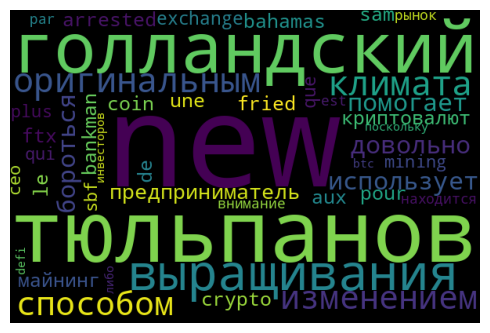

In [35]:
# topic 0
draw_word_cloud(0)

In [77]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

term_doc_matrix = vect.transform(df['headline_cleaned_text'])
embeddings = lda_model.transform(term_doc_matrix)

kmeans = KMeans(n_clusters=30)
clust_labels = kmeans.fit_predict(embeddings)
clust_centers = kmeans.cluster_centers_

embeddings_to_tsne = np.concatenate((embeddings,clust_centers), axis=0)

tSNE =  TSNE(n_components=2, perplexity=15)
tsne_embeddings = tSNE.fit_transform(embeddings_to_tsne)
tsne_embeddings, centroids_embeddings = np.split(tsne_embeddings, [len(clust_labels)], axis=0)

/home/danil/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [80]:
import matplotlib.cm as cm
clust_indices = np.unique(clust_labels)

clusters = {clust_ind : [] for clust_ind in clust_indices}
for emb, label in zip(tsne_embeddings, clust_labels):
    clusters[label].append(emb)

for key in clusters.keys():
    clusters[key] = np.array(clusters[key])
colors = cm.rainbow(np.linspace(0, 1, len(clust_indices)))

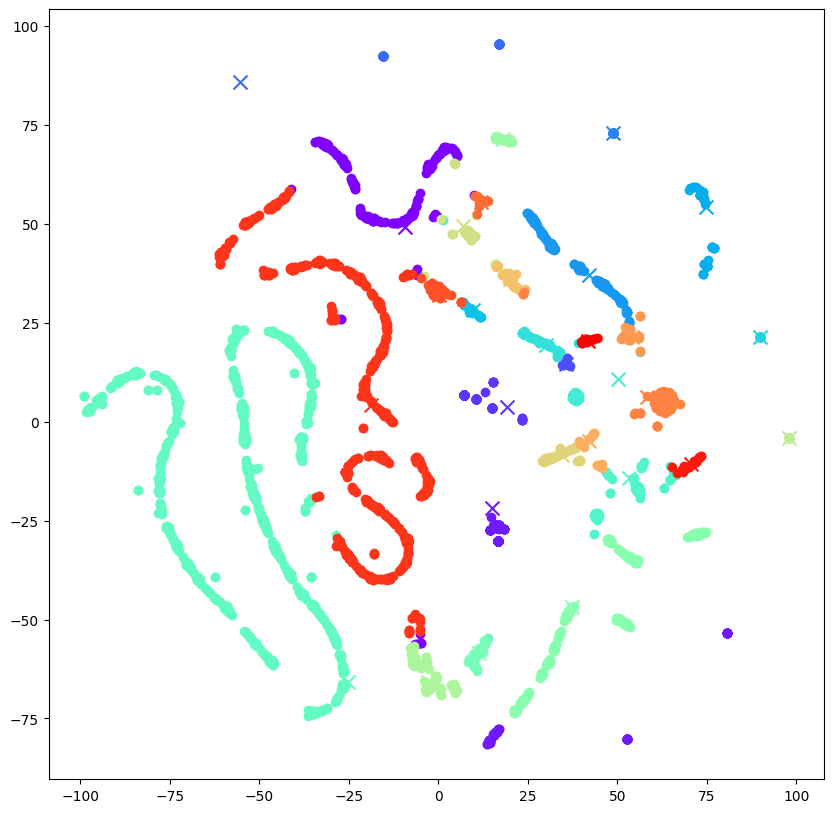

In [81]:
plt.figure(figsize=(10,10))
for ind, color in zip(clust_indices, colors):
    x = clusters[ind][:,0]
    y = clusters[ind][:,1]
    plt.scatter(x, y, color=color)
    
    centroid = centroids_embeddings[ind]
    plt.scatter(centroid[0],centroid[1], color=color, marker='x', s=100)

plt.show()